# import essentials

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing,metrics 

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

## Load Data

In [3]:
train_data=pd.read_csv("train_s3TEQDk.csv")
test_data=pd.read_csv("test_mSzZ8RL.csv")
sample_data=pd.read_csv("sample_submission_eyYijxG.csv")

In [4]:
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
train_data.groupby("Is_Lead").count()

## Data imbalance in our training data 

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
Is_Lead,,,,,,,,,,
0,187437,187437,187437,187437,187437,187437,187437,183087,187437,187437
1,58288,58288,58288,58288,58288,58288,58288,33313,58288,58288


# Describe the Data

In [6]:
train_data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


# info

In [7]:
#observe the different feature type present in the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


# Categorical Feature Encoding

## Categorical cols Distribution

In [8]:
train_data.drop(["ID"],axis=1,inplace=True) # Dropping the Id column
features=train_data.columns.values
categorical_features=train_data.select_dtypes(include="object").columns.tolist() # list of only categorical features
numerical_features=train_data.select_dtypes(include=np.number).columns.tolist() # List of only numerical features 
print("categorical features Columns",categorical_features)
print("numerical Features Columns",numerical_features)

categorical features Columns ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
numerical Features Columns ['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']


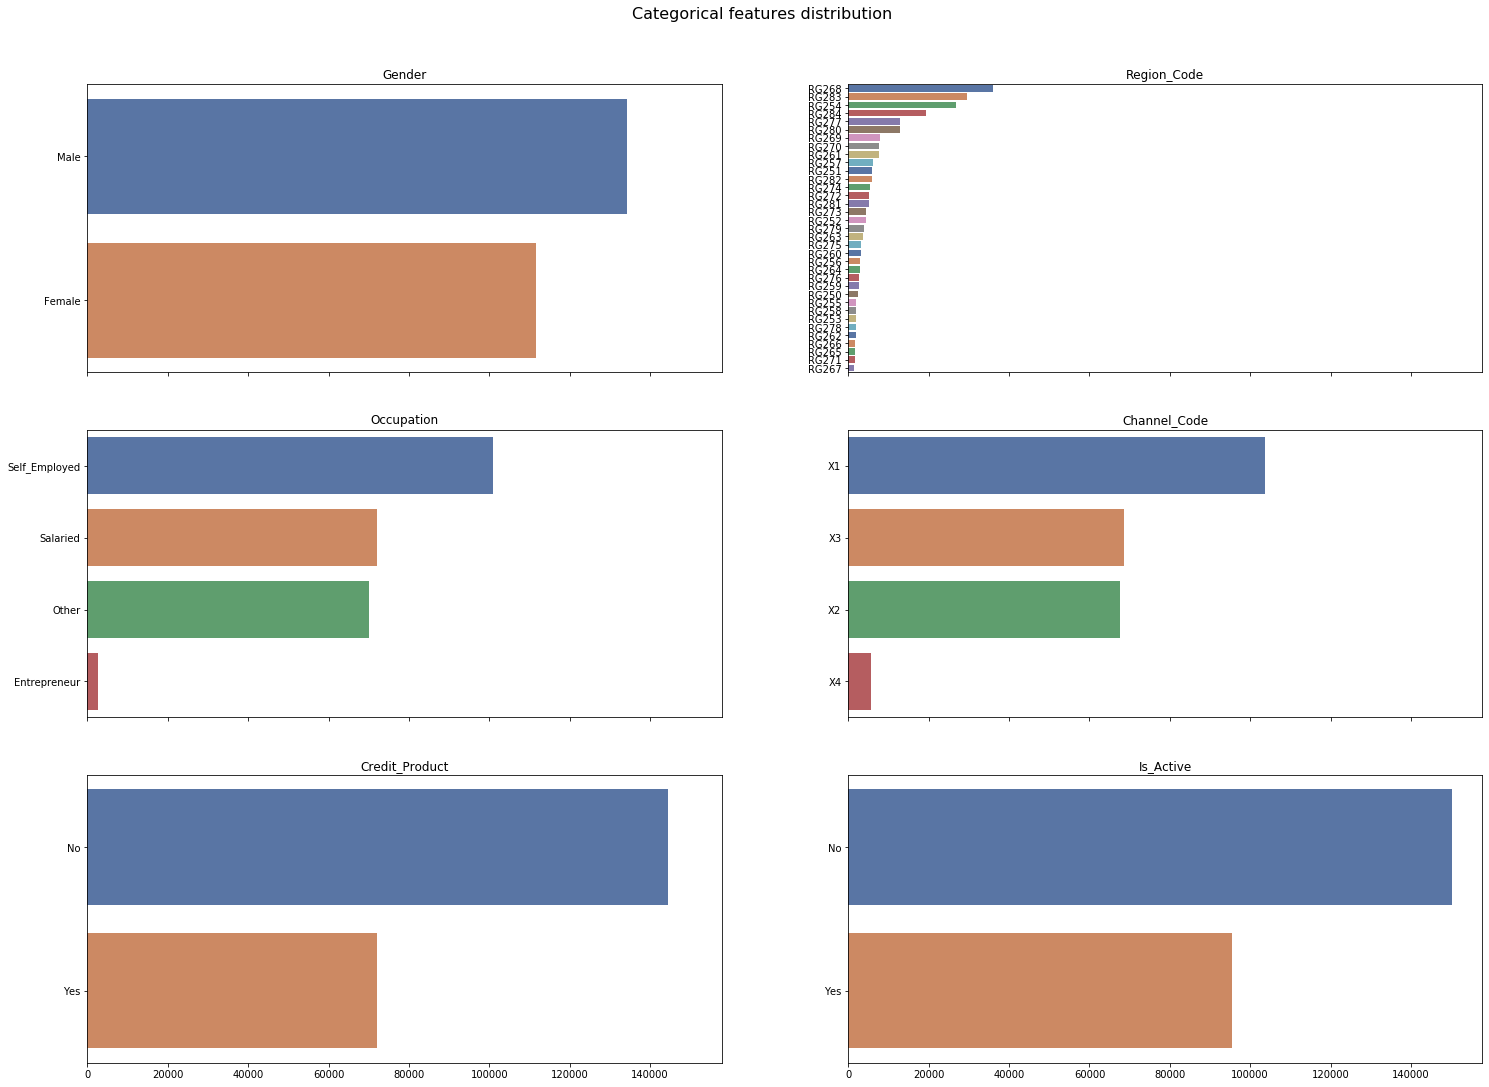

In [9]:
### Categorical features distribution
idx=0
f,axes=plt.subplots(3,2,sharex=True,figsize=(25,18))
plt.suptitle('Categorical features distribution', size=16, y=(0.94))

for row in range(3):
    for col in range(2):
        data=train_data[categorical_features[idx]].value_counts()
        sns.barplot(x=data.values,y=data.index,palette="deep",ax=axes[row,col])
        axes[row,col].set_title(categorical_features[idx])
        idx+=1

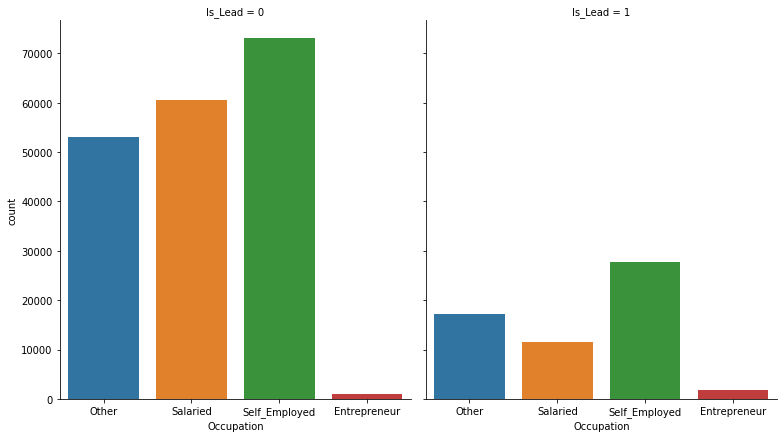

In [10]:
sns.catplot(x="Occupation",col='Is_Lead',
           data=train_data,kind='count',
           height=6,aspect=.9);

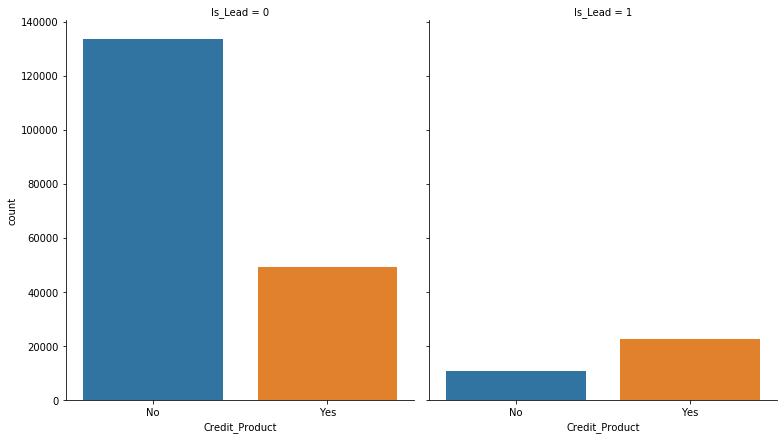

In [11]:
sns.catplot(x="Credit_Product",col='Is_Lead',
           data=train_data,kind='count',
           height=6,aspect=.9);

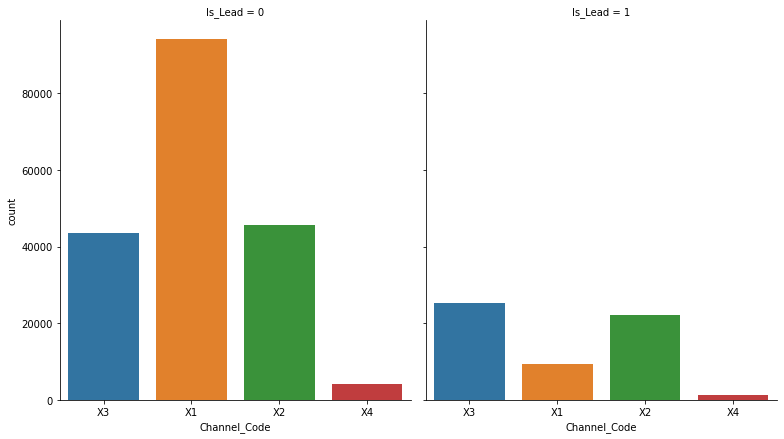

In [12]:
sns.catplot(x="Channel_Code",col='Is_Lead',
           data=train_data,kind='count',
           height=6,aspect=.9);

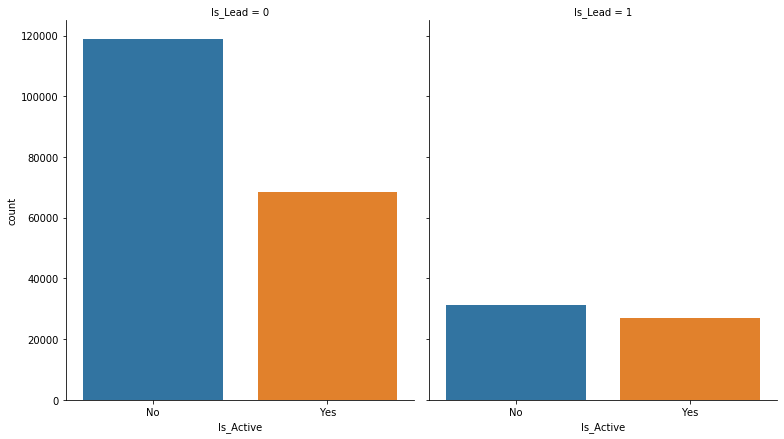

In [13]:
sns.catplot(x="Is_Active", col="Is_Lead",
                data=train_data, kind="count",
                height=6, aspect=.9);

## Encoding Cat features

In [14]:
train_data["Region_Code"].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [15]:
#Data Encoding
train_data["Gender"]=train_data["Gender"].replace({"Female":0,"Male":1})
train_data["Occupation"]=train_data["Occupation"].replace({"Self_Employed":1,"Salaried":2,"Other":3,"Entrepreneur":4})
train_data["Channel_Code"]=train_data["Channel_Code"].replace({'X1':'1','X2':'2','X3':'3','X4':'4'})
train_data["Credit_Product"]       = train_data["Credit_Product"].replace({'No':'1','Yes':'2'})
train_data["Is_Active"]            = train_data["Is_Active"].replace({'No':'1','Yes':'2'})
train_data["Region_Code"]          = train_data["Region_Code"].apply(lambda x:x[2:])

In [16]:
train_data["Region_Code"]      =pd.to_numeric(train_data["Region_Code"])
train_data["Channel_Code"]     = pd.to_numeric(train_data["Channel_Code"])
train_data["Credit_Product"]   = pd.to_numeric(train_data["Credit_Product"])
train_data["Is_Active"]        = pd.to_numeric(train_data["Is_Active"])

# EDA (Exploratory Data Analysis)

## Numericals Columns Distribution


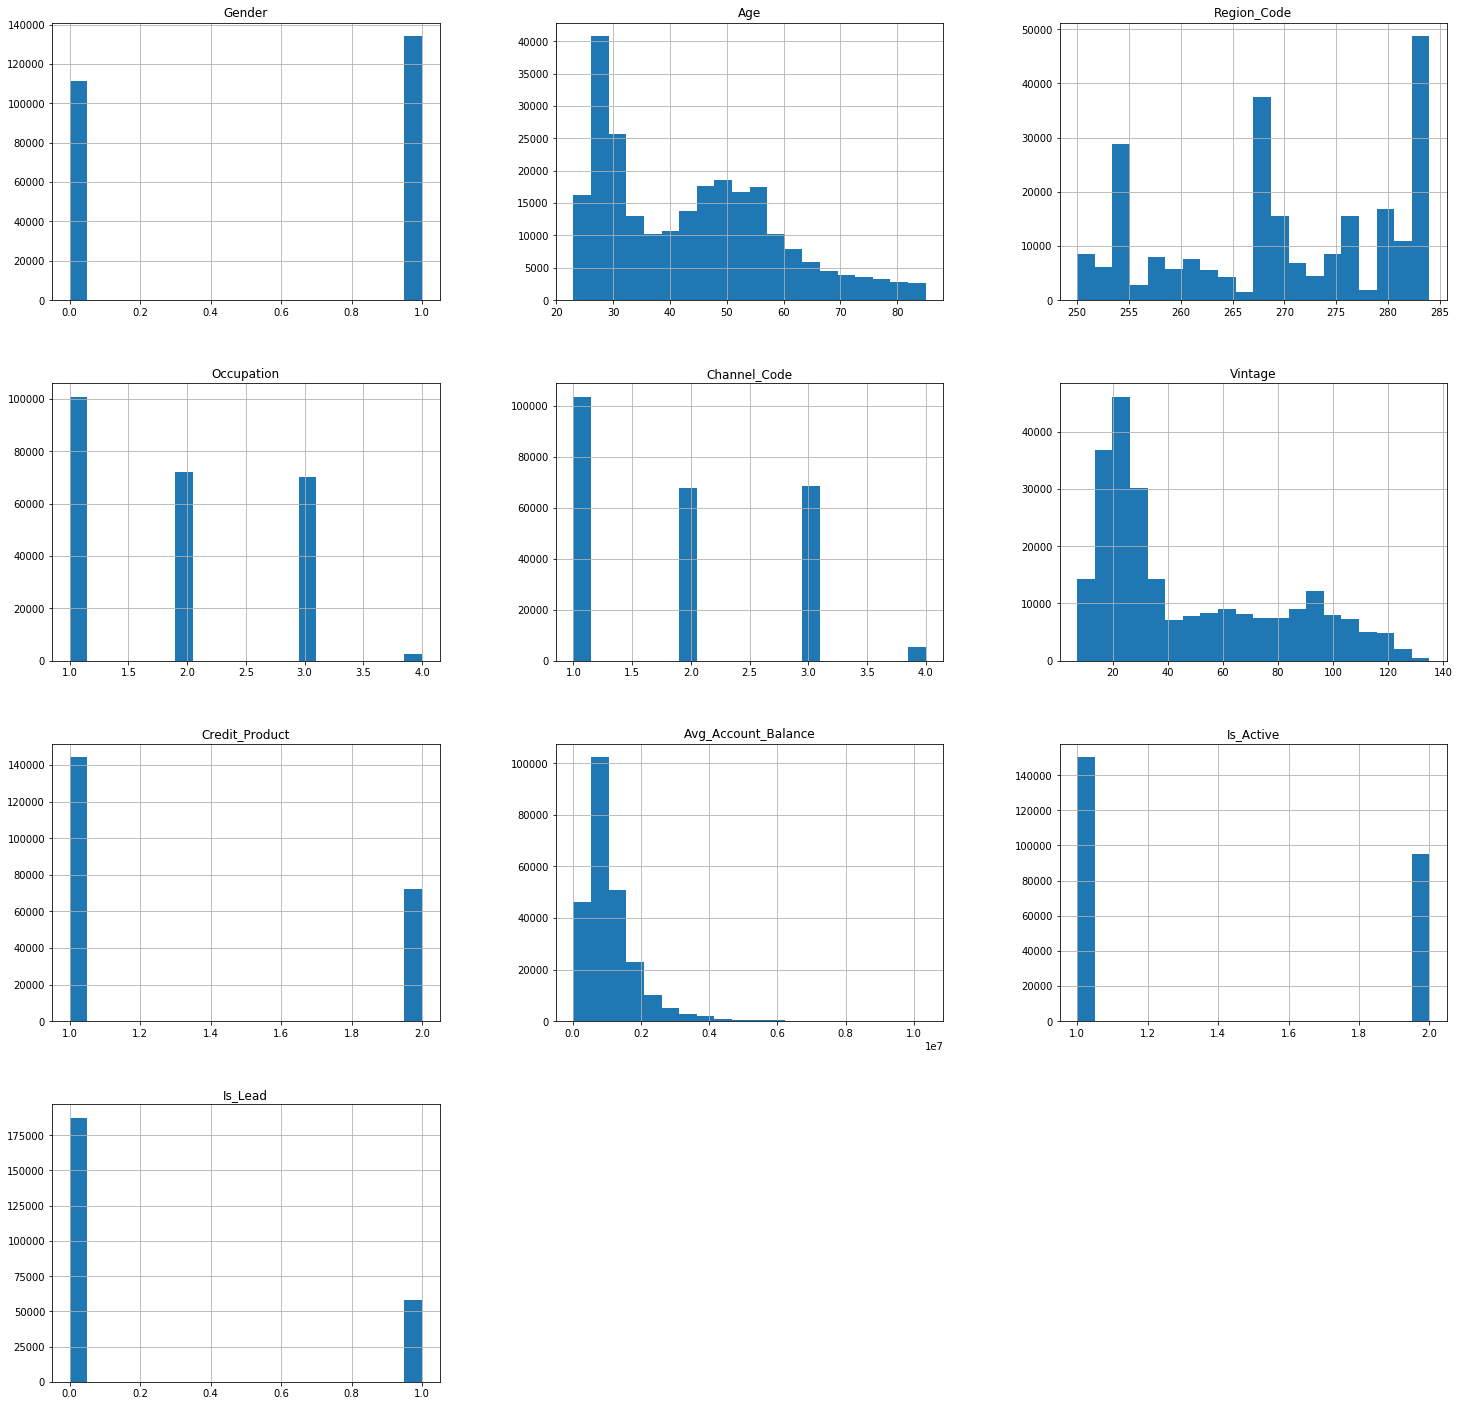

In [17]:
train_data.hist(bins=20,figsize=(25,25))
plt.show()

## Scatter Plot

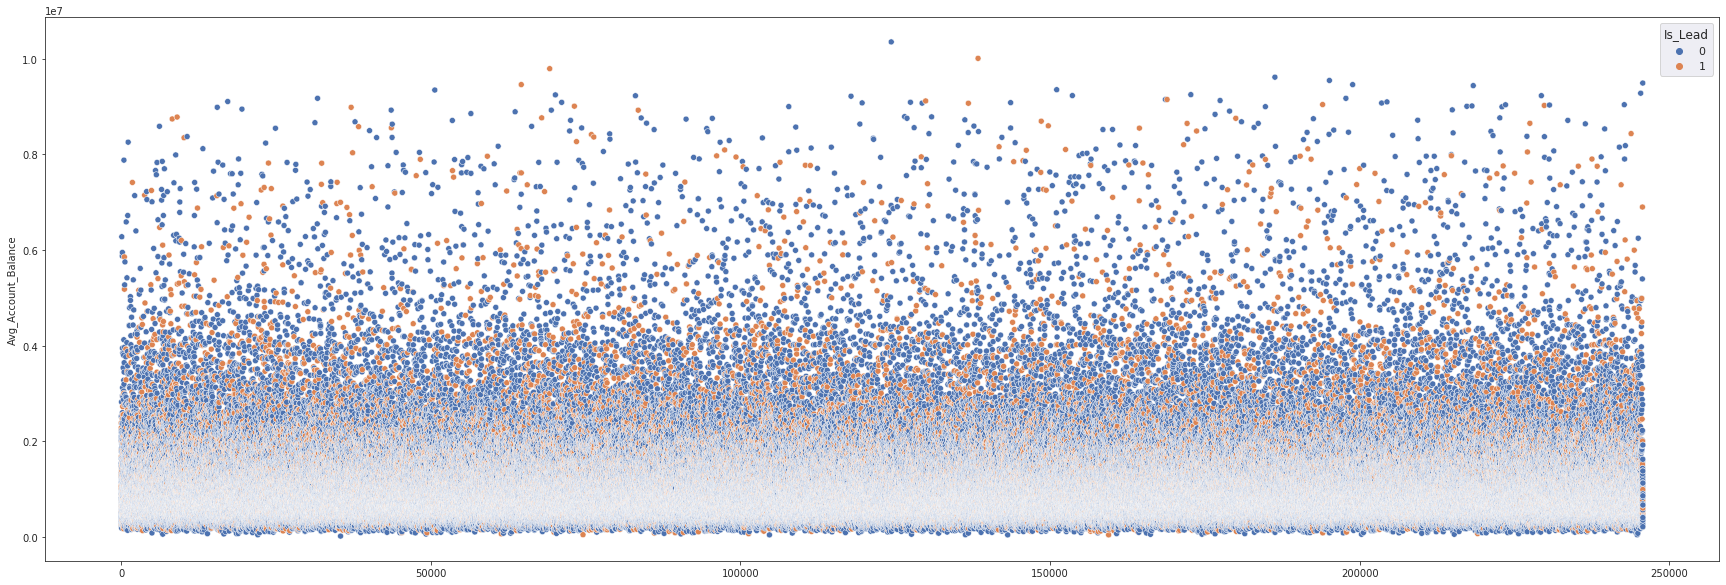

In [18]:
#Plot
sns.set_style("ticks")
fig,ax=plt.subplots()
fig.set_size_inches(30,10)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=train_data.index,y=train_data["Avg_Account_Balance"],hue=train_data['Is_Lead']);

In [19]:
# bivariate analysis by plotting pair plot
# pair-plot
# plt.close()
# sns.set_style("whitegrid")
# sns.pairplot(train_data, hue="Is_Lead", height=3)
# plt.show()

## Plotting Distribution of all the features

<Figure size 432x288 with 0 Axes>

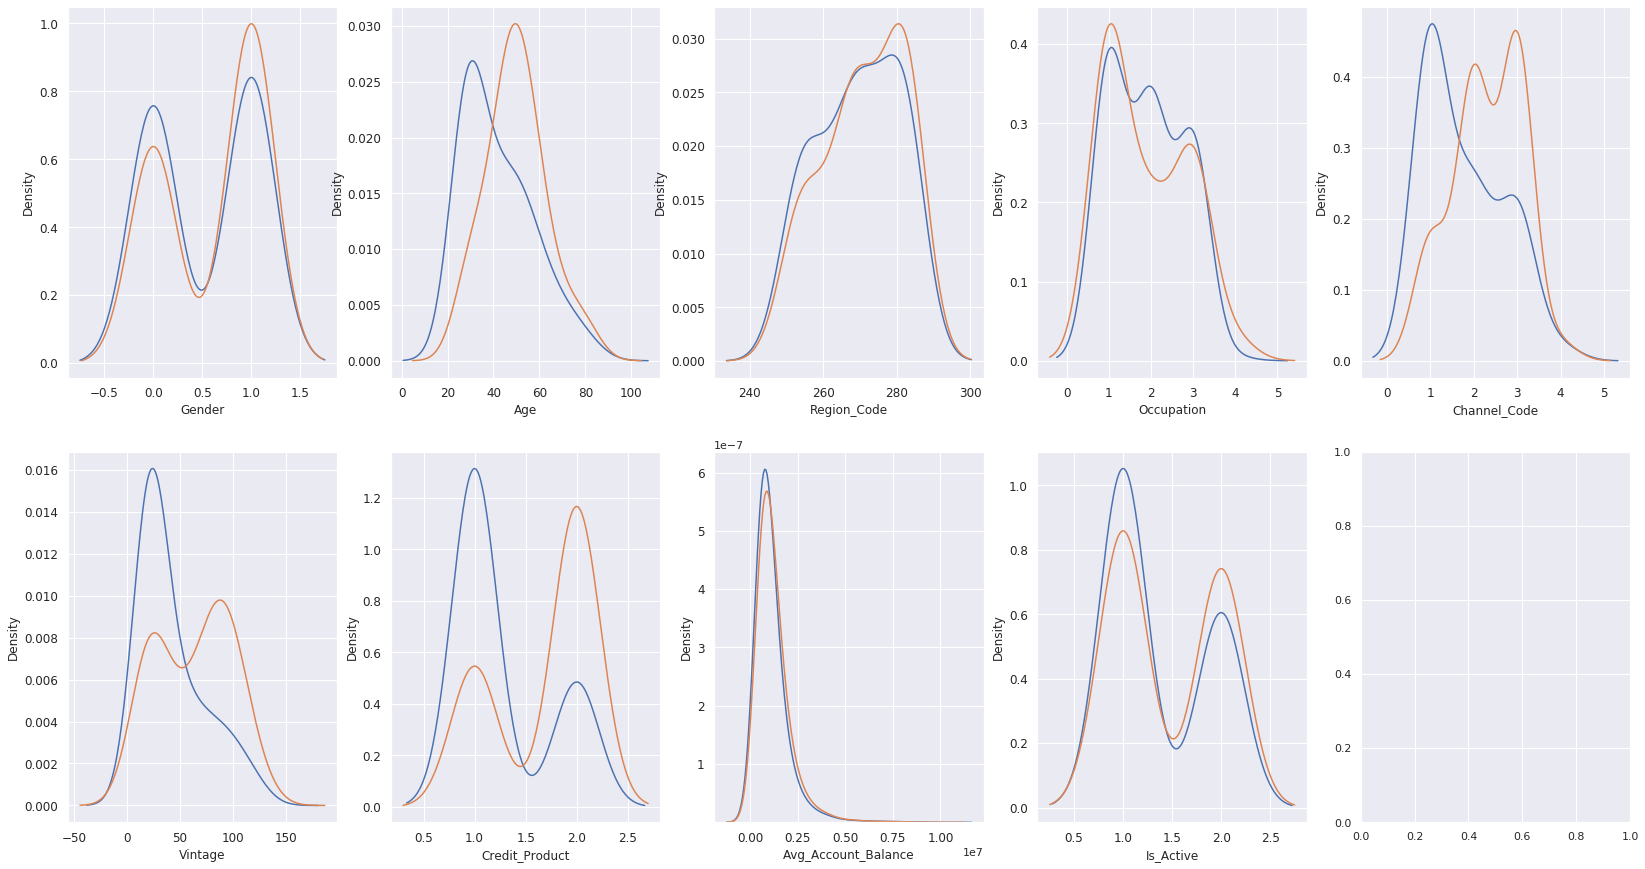

In [20]:
#Plotting the distributions of all the featuers

# Plotting numerical variable in displot to visualise the distribution
train_num=train_data.select_dtypes(include="number")
var=list(train_num.columns.values)
# dropping Class columns from the list
var.remove("Is_Lead")
i=0
t0=train_data.loc[train_data["Is_Lead"]==0]
t1=train_data.loc[train_data["Is_Lead"]==1]
plt.figure()
fig, ax = plt.subplots(2,5,figsize=(28,15))
for feature in var:
    i+=1

    plt.subplot(2,5,i)
    sns.kdeplot(t0[feature],bw=0.5,label=0)
    sns.kdeplot(t1[feature],bw=0.5,label=1)
    plt.xlabel(feature,fontsize=12)
    locs,labels=plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


### Avg_Account_Balance is Highly Overlapping so it is better to remove

In [21]:
# train_data.drop(["Avg_Account_Balance"],axis=1,inplace=True)#dropping Avg_Account_Balance col

# Handling missing Values

In [22]:
# Checking for the missing value present in each columns
total=train_data.isnull().sum().sort_values(ascending=False)
percent=(train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total,percent],axis=1,keys=["Total","percent"]).transpose()

,Credit_Product,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead
Total,29325.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,11.934073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
train_data.groupby("Credit_Product").count()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead
Credit_Product,,,,,,,,,
1.0,144357,144357,144357,144357,144357,144357,144357,144357,144357
2.0,72043,72043,72043,72043,72043,72043,72043,72043,72043


In [24]:
#imputing Credit_Product Nan values with the new value 3
train_data["Credit_Product"]=train_data["Credit_Product"].fillna(3)
# again Checking for the missing value present in each columns
total=train_data.isnull().sum().sort_values(ascending=False)
percent=(train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total,percent],axis=1,keys=["Total","percent"]).transpose()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


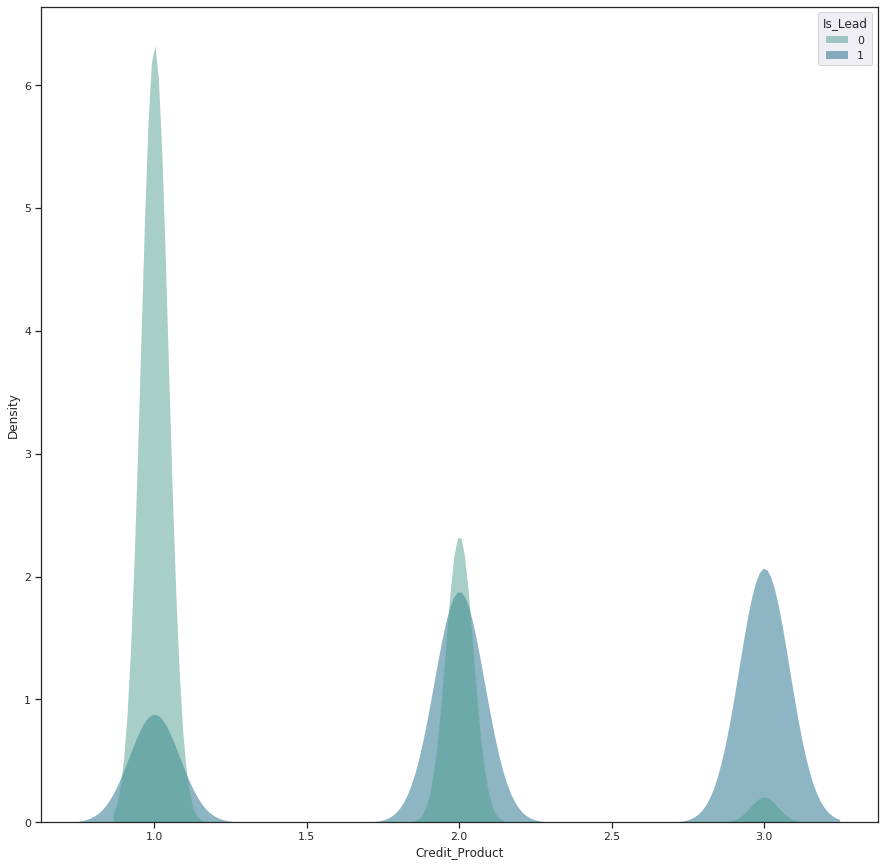

In [25]:
# Plot
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,15)
sns.set_theme(style="darkgrid")
sns.kdeplot(data=train_data,
           x="Credit_Product",
           hue="Is_Lead",
           fill=True,
           common_norm=False,
           palette="crest",
           alpha=.5,
           linewidth=0);

# Feature Engineering

In [26]:
train=train_data.copy()
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,268,3,3,43,1.0,1045696,1,0
1,0,30,277,2,1,32,1.0,581988,1,0
2,0,56,268,1,3,26,1.0,1484315,2,0
3,1,34,270,2,1,19,1.0,470454,1,0
4,0,30,282,2,1,33,1.0,886787,1,0


## Binning on age

In [27]:
train.loc[train["Age"].idxmax()]

Gender                      1.0
Age                        85.0
Region_Code               282.0
Occupation                  3.0
Channel_Code                3.0
Vintage                   115.0
Credit_Product              2.0
Avg_Account_Balance    891513.0
Is_Active                   1.0
Is_Lead                     0.0
Name: 411, dtype: float64

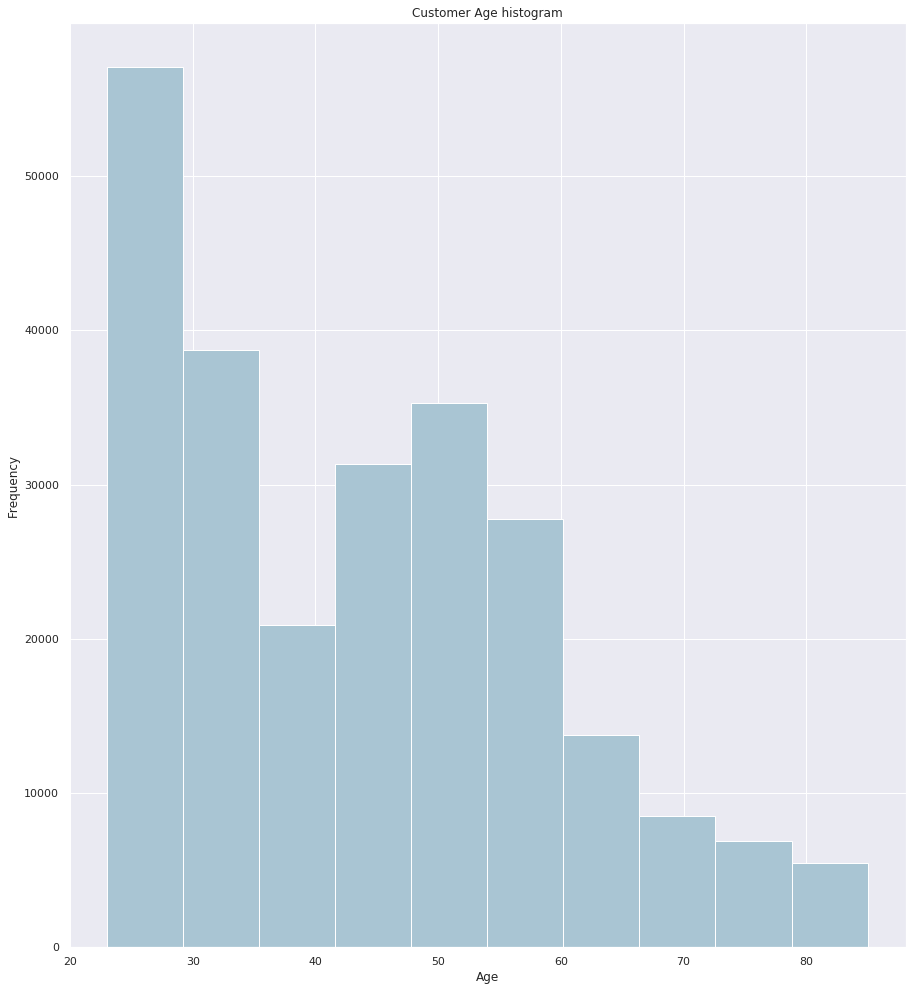

In [28]:
fig,ax=plt.subplots(figsize=(15,17))
train["Age"].hist(color='#A9C5D3')
ax.set_title("Customer Age histogram")
ax.set_xlabel("Age",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12);

Age bins range

23 -  29  : 2

30 - 39  : 3

40 - 49  : 4

50 - 59  : 5

60 - 69  : 6

70 - 579  : 7

80 - 85  : 8

In [29]:
train["Age_bins"]=np.array(np.floor(np.array(train["Age"])/10.))
train.iloc[20:25]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_bins
20,1,44,269,1,2,19,2.0,1001650,1,1,4.0
21,1,27,257,2,1,21,1.0,1239342,1,0,2.0
22,0,32,279,2,1,26,1.0,1339779,2,0,3.0
23,1,50,280,1,3,99,1.0,887330,2,0,5.0
24,0,31,282,2,1,33,1.0,396806,1,0,3.0


## Binarization on Occupation
create a column, if there is a 4 in the occupation it will put 1 corresponds to 4

In [30]:
occupation_binary=np.array(train["Occupation"])
train["Occupation_binary"]=train["Occupation"].map(lambda x:1 if x==4 else 0)
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_bins,Occupation_binary
0,0,73,268,3,3,43,1.0,1045696,1,0,7.0,0
1,0,30,277,2,1,32,1.0,581988,1,0,3.0,0
2,0,56,268,1,3,26,1.0,1484315,2,0,5.0,0
3,1,34,270,2,1,19,1.0,470454,1,0,3.0,0
4,0,30,282,2,1,33,1.0,886787,1,0,3.0,0


## Binarization on Credit product
create a column, if there is a 3 in the Credit product it will put 1 corresponds to 3

In [31]:
train["Credit_Product_binary"]=train["Credit_Product"].map(lambda x:1 if x==3 else 0)
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_bins,Occupation_binary,Credit_Product_binary
0,0,73,268,3,3,43,1.0,1045696,1,0,7.0,0,0
1,0,30,277,2,1,32,1.0,581988,1,0,3.0,0,0
2,0,56,268,1,3,26,1.0,1484315,2,0,5.0,0,0
3,1,34,270,2,1,19,1.0,470454,1,0,3.0,0,0
4,0,30,282,2,1,33,1.0,886787,1,0,3.0,0,0


## Binning Avg_Account_Balance with inter quartile range

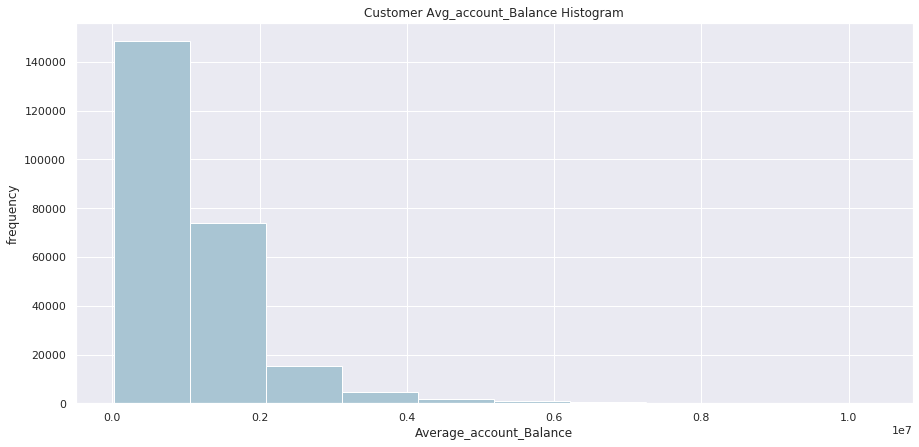

In [34]:
fig,ax=plt.subplots(figsize=(15,7))
train["Avg_Account_Balance"].hist(color="#A9C5D3")
ax.set_title("Customer Avg_account_Balance Histogram",fontsize=12)
ax.set_xlabel("Average_account_Balance",fontsize=12)
ax.set_ylabel("frequency",fontsize=12);

In [35]:
quantiles_range=[0,.25,.5,.75,1.]
quantiles=train["Avg_Account_Balance"].quantile(quantiles_range)
print(quantiles)

0.00       20790.0
0.25      604310.0
0.50      894601.0
0.75     1366666.0
1.00    10352009.0
Name: Avg_Account_Balance, dtype: float64


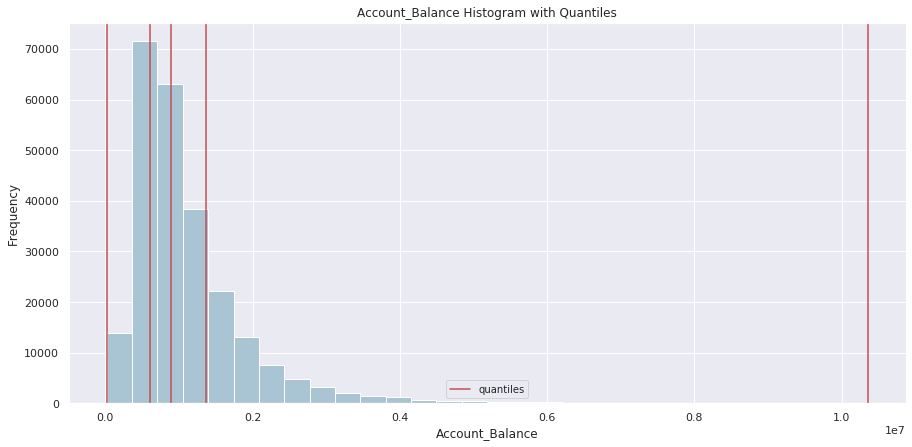

In [37]:
fig,ax=plt.subplots(figsize=(15,7))
train["Avg_Account_Balance"].hist(bins=30,color="#A9C5D3")
for quantile in quantiles:
    qvl=plt.axvline(quantile,color='r')
ax.legend([qvl],['quantiles'],fontsize=10)

ax.set_title('Account_Balance Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Account_Balance', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

In [40]:
quantile_labels=["25","50","75","100"]
train["Avg_account_Balance_quantile"]=pd.qcut(train["Avg_Account_Balance"],q=quantiles_range,labels=quantile_labels)
train.iloc[4:9]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_bins,Occupation_binary,Credit_Product_binary,Avg_account_Balance_quantile
4,0,30,282,2,1,33,1.0,886787,1,0,3.0,0,0,50
5,1,56,261,1,1,32,1.0,544163,2,0,5.0,0,0,25
6,1,62,282,3,3,20,3.0,1056750,2,1,6.0,0,1,75
7,0,48,265,1,3,13,1.0,444724,2,0,4.0,0,0,25
8,0,40,283,1,2,38,1.0,1274284,1,0,4.0,0,0,75


## log transformation on Avg_Account_Balance with inter quartile range

In [43]:
train["Avg_account_Balance_log"]=np.log(1+train["Avg_Account_Balance"])
train.iloc[4:9]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_bins,Occupation_binary,Credit_Product_binary,Avg_account_Balance_quantile,Avg_account_Balance_log
4,0,30,282,2,1,33,1.0,886787,1,0,3.0,0,0,50,13.695361
5,1,56,261,1,1,32,1.0,544163,2,0,5.0,0,0,25,13.207006
6,1,62,282,3,3,20,3.0,1056750,2,1,6.0,0,1,75,13.870710
7,0,48,265,1,3,13,1.0,444724,2,0,4.0,0,0,25,13.005211
8,0,40,283,1,2,38,1.0,1274284,1,0,4.0,0,0,75,14.057896


In [44]:
train["Avg_account_Balance_quantile"]=pd.to_numeric(train["Avg_account_Balance_quantile"])